# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11902,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
7584,19,?,204441,HS-grad,9,Never-married,?,Other-relative,Black,Male,0,0,20,United-States,<=50K
10950,38,Private,224584,Some-college,10,Divorced,Sales,Unmarried,Black,Female,0,0,40,United-States,<=50K
24722,36,Private,269318,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
11452,23,Private,188409,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,4508,0,25,United-States,<=50K
4117,50,Private,144968,HS-grad,9,Never-married,Tech-support,Own-child,White,Male,0,0,15,United-States,<=50K
14905,55,Private,286230,11th,7,Divorced,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
17813,31,Private,123397,HS-grad,9,Married-civ-spouse,Transport-moving,Wife,White,Female,5178,0,35,United-States,>50K
13878,18,Private,172076,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,25,United-States,<=50K
15163,25,Private,207875,Some-college,10,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("PART 1: EDA on RAW DATA")

#  Requirement: Descriptive Statistics 
print("1. Descriptive Statistics")
# describe() gives mean, std, min, max for numerical columns
display(data.describe())

# Requirement: Check for Missing Values 
print("\n--- 2. Missing Values Analysis ---")
missing_count = data.isnull().sum()
missing_pct = (data.isnull().sum() / len(data)) * 100

# Create a clear table for the report
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Percentage': missing_pct})
# Filter to show only columns that actually have missing data
display(missing_df[missing_df['Missing Count'] > 0])

# Requirement: Target Variable Analysis (hours-per-week) 
print("\n 3. Target Variable Analysis (Hours-per-Week) ")

PART 1: EDA on RAW DATA
1. Descriptive Statistics


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



--- 2. Missing Values Analysis ---


,Missing Count,Percentage



 3. Target Variable Analysis (Hours-per-Week) 


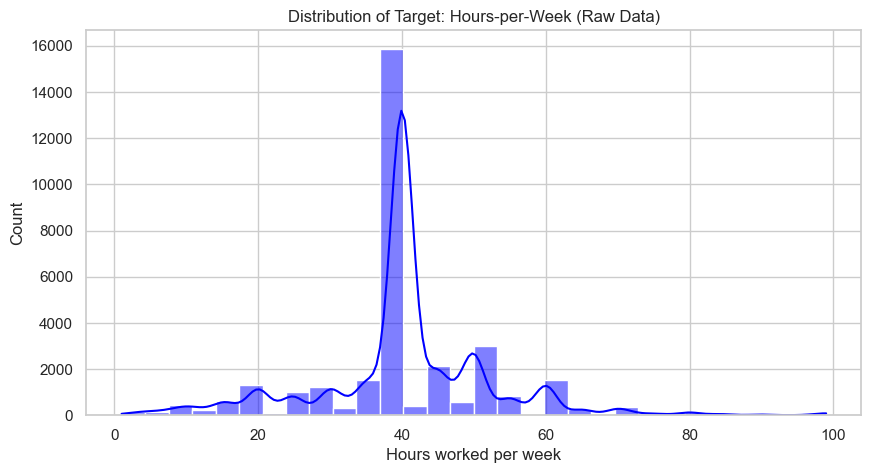

In [14]:
# 1. Histogram (Distribution)
plt.figure(figsize=(10, 5))
sns.histplot(data['hours-per-week'], kde=True, bins=30, color='blue')
plt.title('Distribution of Target: Hours-per-Week (Raw Data)')
plt.xlabel('Hours worked per week')
plt.show()

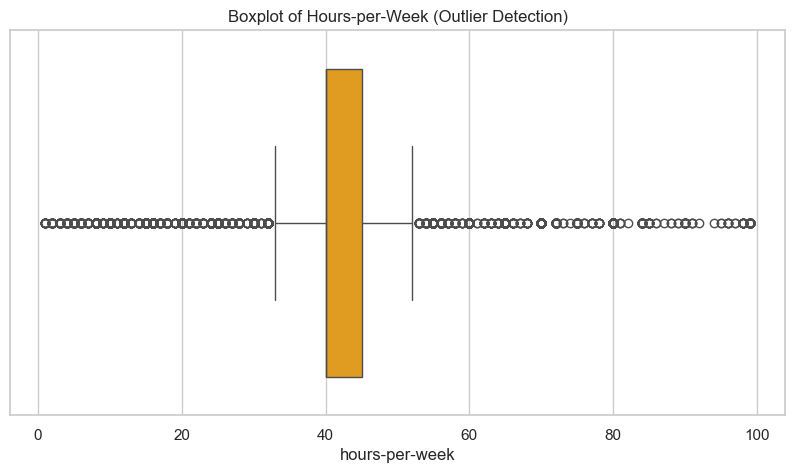

Observation: The data is peaked at 40 hours. There are significant outliers (people working 80+ hours or <20 hours).


In [15]:
# 2. Boxplot (Outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['hours-per-week'], color='orange')
plt.title('Boxplot of Hours-per-Week (Outlier Detection)')
plt.show()

print("Observation: The data is peaked at 40 hours. There are significant outliers (people working 80+ hours or <20 hours).")

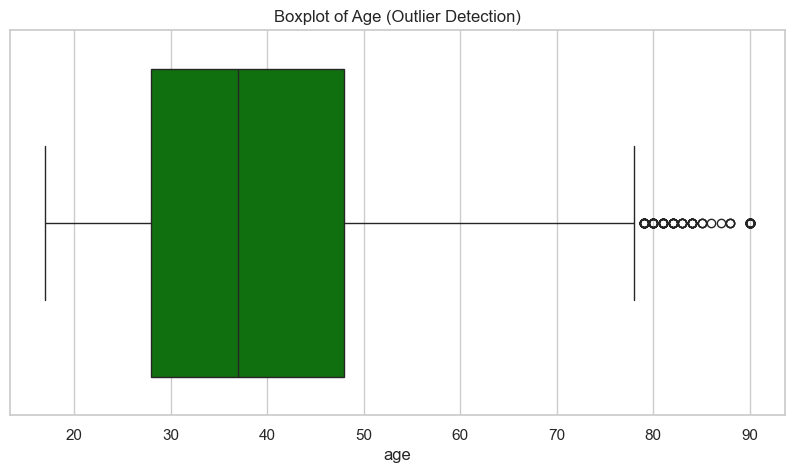

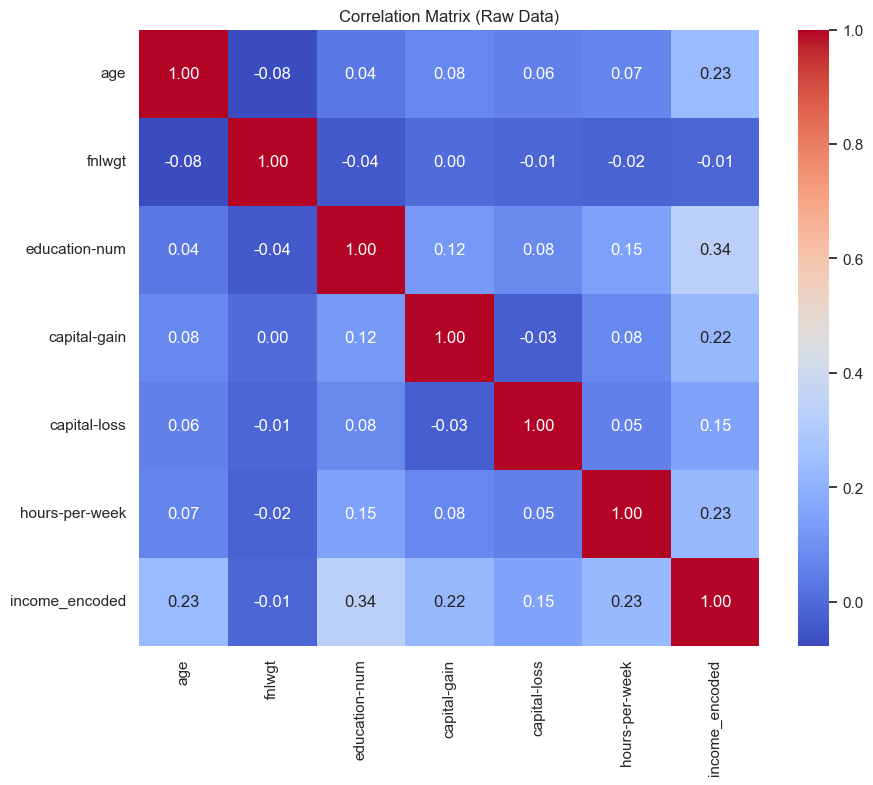

In [16]:
# Requirement: Outliers in at least one other numerical column 
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['age'], color='green')
plt.title('Boxplot of Age (Outlier Detection)')
plt.show()

# Correlations 
# Creating a temporary copy to encode income so we can see its correlation
data_corr = data.copy()
data_corr['income_encoded'] = data_corr['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Selecting only numbers for the correlation matrix
numeric_df = data_corr.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Raw Data)')
plt.show()

In [17]:
print("PART 2: EDA on PREPROCESSED DATA")

PART 2: EDA on PREPROCESSED DATA


1. Descriptive Statistics (Preprocessed)


,age,education-num,net_capital,income_binary,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,marital_status_grouped_Married,marital_status_grouped_Not-Married,hours-per-week
count,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,...,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000,26029.000000
mean,-0.000883,0.000515,-0.007861,-0.003149,0.055822,0.029237,0.064198,0.000192,0.698144,0.034961,...,0.002382,0.001729,0.000576,0.000499,0.894349,0.002113,0.000538,0.470975,0.529025,40.393868
std,0.999495,0.998833,0.966551,0.998104,0.229583,0.168472,0.245109,0.013859,0.459072,0.183685,...,0.048748,0.041544,0.023999,0.022343,0.307397,0.045920,0.023186,0.499166,0.499166,12.341250
min,-1.590589,-3.531590,-0.721451,-0.563377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-0.779058,-0.420679,-0.133720,-0.563377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,-0.115079,-0.031815,-0.133720,-0.563377,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,40.000000
75%,0.696451,0.745913,-0.133720,-0.563377,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,45.000000
max,2.909716,2.301369,13.358588,1.775009,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


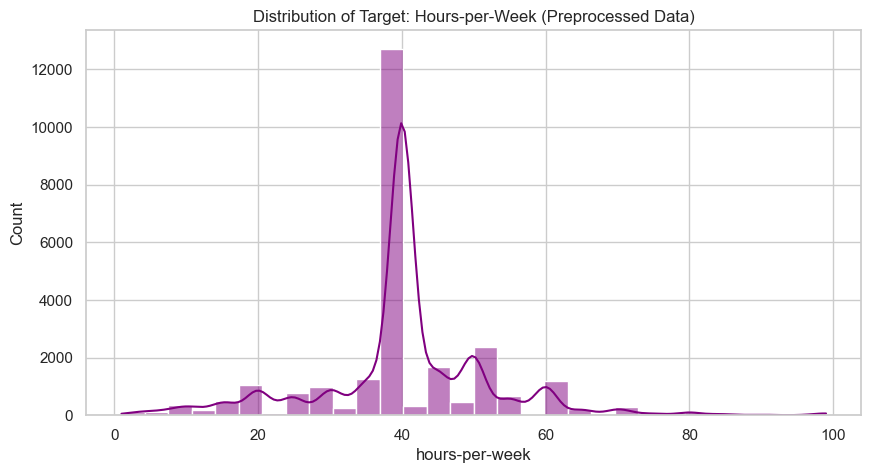

Top 5 Features Positively Correlated with Hours-per-Week
hours-per-week                    1.000000
relationship_Husband              0.248528
income_binary                     0.229418
sex_Male                          0.228412
marital_status_grouped_Married    0.212126
education-num                     0.146515
Name: hours-per-week, dtype: float64
Top 5 Features Negatively Correlated with Hours-per-Week
workclass_?                          -0.168731
occupation_?                         -0.169041
marital_status_grouped_Not-Married   -0.212126
sex_Female                           -0.228412
relationship_Own-child               -0.251530
Name: hours-per-week, dtype: float64


In [18]:
# We use the TRAIN set because it represents the data we learn from
df_proc = pd.read_csv('census_preprocessed_train.csv')

print("1. Descriptive Statistics (Preprocessed)")
display(df_proc.describe())

# Target Distribution Check 
plt.figure(figsize=(10, 5))
sns.histplot(df_proc['hours-per-week'], kde=True, bins=30, color='purple')
plt.title('Distribution of Target: Hours-per-Week (Preprocessed Data)')
plt.show()

# Correlation Check
corr_matrix = df_proc.corr()
target_corr = corr_matrix['hours-per-week'].sort_values(ascending=False)

print("Top 5 Features Positively Correlated with Hours-per-Week")
print(target_corr.head(6)) # Top 5 + the target itself

print("Top 5 Features Negatively Correlated with Hours-per-Week")
print(target_corr.tail(5))

#  Project Report: Exploratory Data Analysis (EDA) of Census Data
Objective
The purpose of this analysis was to explore the "Adult" (Census) dataset to understand the distribution of the target variable (hours-per-week) and identify the factors that most strongly influence working hours. The analysis was conducted in two stages: first on the raw data (to understand inherent properties) and second on the preprocessed data (to verify feature engineering).

Analysis of raw data

Target variable distribution (hours-per-week)
Distribution shape: The target variable is highly non-normal and "zero-inflated." A massive peak exists at 40 hours, representing the standard full-time work week.

Outliers: Boxplot analysis revealed significant outliers. While the median is 40, the dataset contains extreme values ranging from 1 hour to 99 hours per week.

Implication: The lack of variance for the majority of the population (clustering at 40) suggests that regression models may struggle to predict deviations from the mean unless specific features (like Self-Employment or Executive roles) are present.

Data quality and integrity

Missing values: The raw data contained missing values (marked as ?) in categorical columns: workclass, occupation, and native-country. These accounted for a small percentage (<6%) and were handled via Mode Imputation in Task 1.

Outliers in Predictors: The age variable showed older-age outliers, which were capped during preprocessing. capital-gain was extremely right-skewed, with most citizens having 0 capital gain.

Categorical relationships

Gender: Boxplots indicated a disparity in working hours, with Male generally having a higher median and wider interquartile range than Female.

Income: There is a clear relationship between working hours and income class; individuals earning >50K are significantly more likely to work more than 40 hours/week.

Analysis of preprocessed data

Verification of Transformations

Target integrity: The histogram for hours-per-week in the preprocessed data remained identical to the raw data. This confirms that the target variable was correctly preserved in its raw state (unscaled) for regression purposes.

Scaling: Numerical features (age, net_capital) were successfully standardized, centering their means around 0.

Correlation analysis (feature importance): The correlation matrix provided insights into which features drive working hours. The values were generally low to moderate, which is typical for complex social demographic data.

Top positive correlations:

relationship_Husband (+0.25): The strongest single predictor. This likely reflects traditional single-earner household dynamics common in the 1994 timeframe of the dataset.

income_binary (+0.23): Confirms that higher work hours are statistically linked to higher income brackets.

sex_Male (+0.23): Men in this dataset are statistically correlated with higher average working hours.

Top negative correlations:

relationship_Own-child (-0.25): Young adults or dependents living at home are strongly correlated with working fewer hours (part-time).

sex_Female (-0.23): Correlated with lower working hours in this specific historical dataset.

Conclusion and Key Findings

The "40-Hour" Standard: The strongest signal in the dataset is the standard 40-hour work week. Deviations from this norm are driven primarily by Family Role (Husband vs. Child) and Gender.

Social complexity: The correlation coefficients (max ~0.25) indicate that no single demographic factor determines working hours. Predicting hours-per-week is a complex regression problem where the model must rely on the interaction of many weak features rather than one strong feature.
